# Capstone Project - The Battle of Neighborhoods in Istanbul


In [1]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
! pip install geocoder
import geocoder

In [2]:
data=pd.read_html("https://en.wikipedia.org/wiki/List_of_districts_of_Istanbul")[0]
data.head()

,District,Population (2019),Area (km²),Density (per km²),Mensual household income TL(USD),Annual household income TL(USD)
0,Adalar,15238,11.05,1379,6.652₺ (918$),"79.821₺ (10,978$)"
1,Arnavutköy,282488,450.35,627,2.030₺ (279$),"24.360₺ (3,350$)"
2,Ataşehir,425094,25.23,16849,6.577₺ (904$),"78.924₺ (10,854$)"
3,Avcılar,448882,42.01,10685,3.662₺ (503$),"43.938₺ (6,064$)"
4,Bağcılar,745125,22.36,33324,3.197₺ (441$),"38.367₺ (5,295$)"


In [3]:
data=data.drop([39,40])

In [4]:
data=data.drop(columns=['Mensual household income TL(USD)'],axis=1)

In [5]:
data.head()

,District,Population (2019),Area (km²),Density (per km²),Annual household income TL(USD)
0,Adalar,15238,11.05,1379,"79.821₺ (10,978$)"
1,Arnavutköy,282488,450.35,627,"24.360₺ (3,350$)"
2,Ataşehir,425094,25.23,16849,"78.924₺ (10,854$)"
3,Avcılar,448882,42.01,10685,"43.938₺ (6,064$)"
4,Bağcılar,745125,22.36,33324,"38.367₺ (5,295$)"


In [6]:
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim    
longitude = [] 
latitude = [] 
def findGeocode(District): 
        
    try: 
          
       
        geolocator = Nominatim(user_agent="https://en.wikipedia.org/wiki/List_of_districts_of_Istanbul") 
          
        return geolocator.geocode(District) 
      
    except GeocoderTimedOut: 
        return findGeocode(District)     
  
  
for i in (data["District"]): 
      
    if findGeocode(i) != None: 
           
        loc = findGeocode(i) 
          
         
        latitude.append(loc.latitude) 
        longitude.append(loc.longitude) 
       
   
    else: 
        latitude.append(np.nan) 
        longitude.append(np.nan) 

In [7]:
data["Longitude"] = longitude 
data["Latitude"] = latitude 

In [8]:
data.head()

,District,Population (2019),Area (km²),Density (per km²),Annual household income TL(USD),Longitude,Latitude
0,Adalar,15238,11.05,1379,"79.821₺ (10,978$)",29.091027,40.876259
1,Arnavutköy,282488,450.35,627,"24.360₺ (3,350$)",28.740729,41.184182
2,Ataşehir,425094,25.23,16849,"78.924₺ (10,854$)",29.106720,40.984749
3,Avcılar,448882,42.01,10685,"43.938₺ (6,064$)",28.717547,40.980135
4,Bağcılar,745125,22.36,33324,"38.367₺ (5,295$)",28.857898,41.033899


In [9]:
data=data.drop([41,42])
data

,District,Population (2019),Area (km²),Density (per km²),Annual household income TL(USD),Longitude,Latitude
0,Adalar,15238,11.05,1379,"79.821₺ (10,978$)",29.091027,40.876259
1,Arnavutköy,282488,450.35,627,"24.360₺ (3,350$)",28.740729,41.184182
2,Ataşehir,425094,25.23,16849,"78.924₺ (10,854$)",29.106720,40.984749
3,Avcılar,448882,42.01,10685,"43.938₺ (6,064$)",28.717547,40.980135
4,Bağcılar,745125,22.36,33324,"38.367₺ (5,295$)",28.857898,41.033899
5,Bahçelievler,611059,16.62,36766,"56.088₺ (7,741$)",35.627761,38.881312
6,Bakırköy,229239,29.64,7734,"106.140₺ (14,650$)",28.867974,40.983541
7,Başakşehir,460259,104.30,4413,"54.152₺ (7,474$)",28.806163,41.097693
8,Bayrampaşa,274735,9.61,28588,"41.762₺ (5,764$)",28.912260,41.035738
9,Beşiktaş,182649,18.01,10142,"126.720₺ (17,490$)",29.007528,41.042847


In [10]:
data.shape

(39, 7)

In [11]:
%pip install folium

     |████████████████████████████████| 93 kB 3.9 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [12]:
import folium

In [13]:
address = 'Istanbul'

geolocator = Nominatim(user_agent="https://en.wikipedia.org/wiki/List_of_districts_of_Istanbul")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Istanbul are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Istanbul are 41.0096334, 28.9651646.


In [14]:
map_Istanbul = folium.Map(location=[latitude, longitude], zoom_start=11)

 # add markers to map
for lat, lng, label in zip(data['Latitude'], data['Longitude'], data['District']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Istanbul) 
    
map_Istanbul

In [15]:
CLIENT_ID = '1BALN0HBRJ5OIF4NSILGCIZMLRTMW5A4HD1NWCXEQVYIA5WV' # your Foursquare ID
CLIENT_SECRET = 'RCRNLG3EFFQDXZ4QZ3YJEX20ZHTGKHJCYBTBWGXWX4PRZOT1' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1BALN0HBRJ5OIF4NSILGCIZMLRTMW5A4HD1NWCXEQVYIA5WV
CLIENT_SECRET:RCRNLG3EFFQDXZ4QZ3YJEX20ZHTGKHJCYBTBWGXWX4PRZOT1


In [16]:
data.loc[0, 'District']


'Adalar'

In [17]:
neighborhood_latitude = data.loc[0, 'Latitude']
neighborhood_longitude = data.loc[0, 'Longitude'] 

neighborhood_name = data.loc[0, 'District']

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Adalar are 40.87625945, 29.091027262109563.


In [18]:
LIMIT = 100

radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=1BALN0HBRJ5OIF4NSILGCIZMLRTMW5A4HD1NWCXEQVYIA5WV&client_secret=RCRNLG3EFFQDXZ4QZ3YJEX20ZHTGKHJCYBTBWGXWX4PRZOT1&v=20180604&ll=40.87625945,29.091027262109563&radius=500&limit=100'

In [19]:
import json
results = requests.get(url).json()
print('json')

json


In [20]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [21]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Merit Halki Palace Hotel,Hotel,40.878802,29.090974
1,İnönü Evi Müzesi,History Museum,40.878251,29.093647
2,L'isola Guesthouse,Bed & Breakfast,40.877038,29.096136
3,Aqua Green Beach,Beach,40.880498,29.090354
4,Huseyin Rahmi Gurpinar Muzesi,Museum,40.877224,29.092228


In [22]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

18 venues were returned by Foursquare.


In [23]:
print ('{} unique categories in Adalar'.format(nearby_venues['categories'].value_counts().shape[0]))

15 unique categories in Adalar


In [24]:
print (nearby_venues['categories'].value_counts()[0:15])

Café               3
Mountain           2
Beach              1
Hotel              1
Farmers Market     1
Pool               1
Bike Trail         1
Surf Spot          1
Harbor / Marina    1
Tennis Court       1
History Museum     1
Boat or Ferry      1
University         1
Bed & Breakfast    1
Museum             1
Name: categories, dtype: int64


Explore Neighborhoods in Istanbul¶


In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)

In [26]:
Istanbul_venues = getNearbyVenues(names=data['District'],
                                   latitudes=data['Latitude'],
                                   longitudes=data['Longitude']
                                  )

Adalar
Arnavutköy
Ataşehir
Avcılar
Bağcılar
Bahçelievler
Bakırköy
Başakşehir
Bayrampaşa
Beşiktaş
Beykoz
Beylikdüzü
Beyoğlu
Büyükçekmece
Çatalca
Çekmeköy
Esenler
Esenyurt
Eyüpsultan
Fatih
Gaziosmanpaşa
Güngören
Kadıköy
Kağıthane
Kartal
Küçükçekmece
Maltepe
Pendik
Sancaktepe
Sarıyer
Silivri
Sultanbeyli
Sultangazi
Şile
Şişli
Tuzla
Ümraniye
Üsküdar
Zeytinburnu


In [27]:
Istanbul_Venue_Category=(Istanbul_venues['Venue Category'].value_counts().index.tolist())
print(Istanbul_Venue_Category)

['Café', 'Turkish Restaurant', 'Coffee Shop', 'Restaurant', 'Dessert Shop', 'Gym', 'Steakhouse', 'Seafood Restaurant', 'Gym / Fitness Center', 'Bakery', 'Hotel', 'Pizza Place', 'Fast Food Restaurant', 'Bar', 'Kebab Restaurant', 'Plaza', 'Art Gallery', 'Mobile Phone Shop', 'Tea Room', 'Electronics Store', 'Park', 'Hookah Bar', 'Breakfast Spot', 'Kofte Place', 'Arcade', 'Burger Joint', 'Diner', 'Clothing Store', 'Jewelry Store', 'Ice Cream Shop', 'Bookstore', 'Cosmetics Shop', 'Music Venue', 'Pub', 'Soccer Stadium', "Women's Store", 'Grocery Store', 'Soup Place', 'Turkish Home Cooking Restaurant', 'Beer Garden', 'Sporting Goods Shop', 'Bistro', 'Buffet', 'Arts & Crafts Store', 'Fish & Chips Shop', 'Department Store', 'Boutique', 'Mosque', 'Snack Place', 'Pide Place', 'Nightclub', 'Performing Arts Venue', 'Beach', 'Historic Site', 'Comfort Food Restaurant', 'Convenience Store', 'Doner Restaurant', 'Shopping Mall', 'Waterfront', 'Italian Restaurant', 'Middle Eastern Restaurant', 'Food Cour

In [28]:
Istanbul_Venues_only_restaurant = Istanbul_venues[Istanbul_venues['Venue Category'].str.contains( 'Restaurant')].reset_index(drop=True)
Istanbul_Venues_only_restaurant.index = np.arange(1, len(Istanbul_Venues_only_restaurant )+1)

In [29]:
print (Istanbul_Venues_only_restaurant['Venue Category'].value_counts())


Turkish Restaurant                 122
Restaurant                          84
Seafood Restaurant                  43
Fast Food Restaurant                34
Kebab Restaurant                    28
Turkish Home Cooking Restaurant     11
Comfort Food Restaurant              9
Italian Restaurant                   8
Middle Eastern Restaurant            8
Doner Restaurant                     8
Kokoreç Restaurant                   5
Eastern European Restaurant          4
Mediterranean Restaurant             3
Chinese Restaurant                   3
Asian Restaurant                     2
Vegetarian / Vegan Restaurant        2
English Restaurant                   1
Argentinian Restaurant               1
Falafel Restaurant                   1
Sushi Restaurant                     1
Theme Restaurant                     1
American Restaurant                  1
Dumpling Restaurant                  1
Arepa Restaurant                     1
Australian Restaurant                1
Thai Restaurant          

In [30]:
print('There are {} uniques categories.'.format(len(Istanbul_Venues_only_restaurant['Venue Category'].unique())))

There are 31 uniques categories.


In [31]:
Istanbul_Dist_Venues_Top12 = Istanbul_Venues_only_restaurant['Venue Category'].value_counts()[0:12].to_frame(name='frequency')
Istanbul_Dist_Venues_Top12=Istanbul_Dist_Venues_Top12.reset_index()

Istanbul_Dist_Venues_Top12.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Istanbul_Dist_Venues_Top12

,Venue_Category,Frequency
0,Turkish Restaurant,122
1,Restaurant,84
2,Seafood Restaurant,43
3,Fast Food Restaurant,34
4,Kebab Restaurant,28
5,Turkish Home Cooking Restaurant,11
6,Comfort Food Restaurant,9
7,Italian Restaurant,8
8,Middle Eastern Restaurant,8
9,Doner Restaurant,8


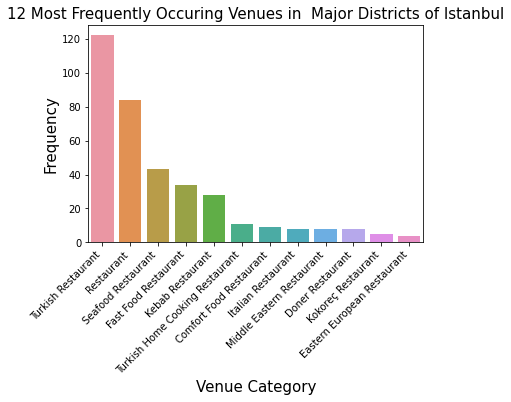

<Figure size 1296x504 with 0 Axes>

In [32]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=Istanbul_Dist_Venues_Top12)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('12 Most Frequently Occuring Venues in  Major Districts of Istanbul', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

In [33]:
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", Istanbul_Venues_only_restaurant.shape)
Istanbul_Venues_only_restaurant.head(10)

Shape of the Data-Frame with Venue Category only Restaurant:  (389, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Arnavutköy,41.184182,28.740729,Noorden Cafe & Nargile & Restaurant,41.183990,28.737595,Restaurant
2,Arnavutköy,41.184182,28.740729,Hatay Katık Döner,41.182010,28.741291,Fast Food Restaurant
3,Arnavutköy,41.184182,28.740729,Onur Kebap Ve Kofte Restaurant,41.185939,28.739412,Restaurant
4,Arnavutköy,41.184182,28.740729,Big Mamma’s,41.186351,28.738677,Restaurant
5,Arnavutköy,41.184182,28.740729,Hamitağa Et Lokantası,41.182679,28.743357,Turkish Restaurant
6,Arnavutköy,41.184182,28.740729,Dürümcü Musa Usta,41.184404,28.743388,Turkish Restaurant
7,Arnavutköy,41.184182,28.740729,Tahtalı Köy Cafe & Restaurant,41.181195,28.742488,Turkish Home Cooking Restaurant
8,Arnavutköy,41.184182,28.740729,Tantunİstanbul,41.185564,28.740209,Fast Food Restaurant
9,Arnavutköy,41.184182,28.740729,Tavuk Dünyası,41.183057,28.735064,Turkish Restaurant
10,Arnavutköy,41.184182,28.740729,Dürümcü Musa Usta,41.184212,28.744761,Kebab Restaurant


In [34]:
Istanbul_Venues_restaurant = Istanbul_Venues_only_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
Istanbul_Venues_restaurant

Neighborhood
Arnavutköy       10
Ataşehir         10
Avcılar          12
Bakırköy          6
Bayrampaşa        5
Bağcılar          9
Başakşehir        4
Beykoz            1
Beylikdüzü       12
Beyoğlu          19
Beşiktaş         14
Büyükçekmece     11
Esenler           3
Esenyurt          6
Eyüpsultan        6
Fatih            20
Gaziosmanpaşa    13
Güngören         28
Kadıköy          10
Kartal            1
Kağıthane        10
Küçükçekmece     11
Maltepe          19
Pendik           19
Sancaktepe        2
Sarıyer          15
Silivri          23
Sultanbeyli      11
Tuzla             1
Zeytinburnu      19
Çatalca          16
Çekmeköy          6
Ümraniye          6
Üsküdar           9
Şişli            22
Name: Venue Category, dtype: int64

In [35]:
Istanbul_Venues_restaurant_df  = Istanbul_Venues_restaurant.to_frame().reset_index()
Istanbul_Venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
Istanbul_Venues_restaurant_df.index = np.arange(1, len(Istanbul_Venues_restaurant_df)+1)
list_rest_no =Istanbul_Venues_restaurant_df['Number of Restaurant'].to_list()
list_dist =Istanbul_Venues_restaurant_df['Neighborhood'].to_list()
print(list_rest_no)
print(list_dist)

[10, 10, 12, 6, 5, 9, 4, 1, 12, 19, 14, 11, 3, 6, 6, 20, 13, 28, 10, 1, 10, 11, 19, 19, 2, 15, 23, 11, 1, 19, 16, 6, 6, 9, 22]
['Arnavutköy', 'Ataşehir', 'Avcılar', 'Bakırköy', 'Bayrampaşa', 'Bağcılar', 'Başakşehir', 'Beykoz', 'Beylikdüzü', 'Beyoğlu', 'Beşiktaş', 'Büyükçekmece', 'Esenler', 'Esenyurt', 'Eyüpsultan', 'Fatih', 'Gaziosmanpaşa', 'Güngören', 'Kadıköy', 'Kartal', 'Kağıthane', 'Küçükçekmece', 'Maltepe', 'Pendik', 'Sancaktepe', 'Sarıyer', 'Silivri', 'Sultanbeyli', 'Tuzla', 'Zeytinburnu', 'Çatalca', 'Çekmeköy', 'Ümraniye', 'Üsküdar', 'Şişli']


In [36]:
Istanbul_onehot = pd.get_dummies(Istanbul_Venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Istanbul_onehot['Neighborhood'] = Istanbul_Venues_only_restaurant['Neighborhood'] 
Istanbul_onehot=Istanbul_onehot[['Neighborhood','Afghan Restaurant', 'American Restaurant', 'Arepa Restaurant',
       'Argentinian Restaurant', 'Asian Restaurant', 'Chinese Restaurant',
       'Comfort Food Restaurant', 'Doner Restaurant', 'Dumpling Restaurant',
       'Eastern European Restaurant', 'English Restaurant',
       'Falafel Restaurant', 'Fast Food Restaurant', 'Halal Restaurant',
       'Italian Restaurant', 'Kebab Restaurant', 'Kokoreç Restaurant',
       'Kumpir Restaurant', 'Mediterranean Restaurant',
       'Middle Eastern Restaurant', 'Restaurant', 'Seafood Restaurant',
       'Sushi Restaurant', 'Syrian Restaurant', 'Thai Restaurant',
       'Theme Restaurant', 'Turkish Home Cooking Restaurant',
       'Turkish Restaurant', 'Vegetarian / Vegan Restaurant']]
Istanbul_onehot.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Dumpling Restaurant,...,Middle Eastern Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Syrian Restaurant,Thai Restaurant,Theme Restaurant,Turkish Home Cooking Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant
1,Arnavutköy,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Arnavutköy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Arnavutköy,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,Arnavutköy,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,Arnavutköy,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [37]:
Istanbul_onehot.shape

(389, 30)

In [38]:
Istanbul_grouped = Istanbul_onehot.groupby('Neighborhood').mean().reset_index()
Istanbul_grouped

,Neighborhood,Afghan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant,Dumpling Restaurant,...,Middle Eastern Restaurant,Restaurant,Seafood Restaurant,Sushi Restaurant,Syrian Restaurant,Thai Restaurant,Theme Restaurant,Turkish Home Cooking Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant
0,Arnavutköy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.300000,0.000000,0.0000,0.00,0.000000,0.000000,0.100000,0.300000,0.000000
1,Ataşehir,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,...,0.000000,0.500000,0.000000,0.0000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
2,Avcılar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,...,0.000000,0.250000,0.000000,0.0000,0.00,0.000000,0.000000,0.083333,0.333333,0.000000
3,Bakırköy,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,0.000000,0.666667,0.000000
4,Bayrampaşa,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,0.000000,0.400000,0.000000
5,Bağcılar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.111111,0.000000,0.0000,0.00,0.000000,0.000000,0.000000,0.444444,0.000000
6,Başakşehir,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.500000,0.000000,0.0000,0.00,0.000000,0.000000,0.000000,0.250000,0.000000
7,Beykoz,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
8,Beylikdüzü,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.416667,0.000000,0.0000,0.00,0.000000,0.000000,0.000000,0.416667,0.000000
9,Beyoğlu,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.052632,0.052632,0.000000,...,0.000000,0.473684,0.000000,0.0000,0.00,0.052632,0.000000,0.052632,0.052632,0.052632


In [39]:
top_venues = 5

for hood in Istanbul_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Istanbul_grouped[Istanbul_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(top_venues))
    print('\n')

----Arnavutköy----
                             venue  freq
0               Turkish Restaurant   0.3
1                       Restaurant   0.3
2             Fast Food Restaurant   0.2
3                 Kebab Restaurant   0.1
4  Turkish Home Cooking Restaurant   0.1


----Ataşehir----
                venue  freq
0          Restaurant   0.5
1    Doner Restaurant   0.3
2  Italian Restaurant   0.1
3    Kebab Restaurant   0.1
4  Turkish Restaurant   0.0


----Avcılar----
                             venue  freq
0               Turkish Restaurant  0.33
1                       Restaurant  0.25
2               Kokoreç Restaurant  0.08
3  Turkish Home Cooking Restaurant  0.08
4                 Doner Restaurant  0.08


----Bakırköy----
                     venue  freq
0       Turkish Restaurant  0.67
1  Comfort Food Restaurant  0.17
2     Fast Food Restaurant  0.17
3        Afghan Restaurant  0.00
4       Kokoreç Restaurant  0.00


----Bayrampaşa----
                     venue  freq
0       Turki

In [40]:
def return_most_common_venues(row, top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:top_venues]

In [41]:
top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Istanbul_grouped['Neighborhood']

for ind in np.arange(Istanbul_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Istanbul_grouped.iloc[ind, :], top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arnavutköy,Restaurant,Turkish Restaurant,Fast Food Restaurant,Kebab Restaurant,Turkish Home Cooking Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant
1,Ataşehir,Restaurant,Doner Restaurant,Italian Restaurant,Kebab Restaurant,Fast Food Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant
2,Avcılar,Turkish Restaurant,Restaurant,Turkish Home Cooking Restaurant,Eastern European Restaurant,Kebab Restaurant,Kokoreç Restaurant,Doner Restaurant,Comfort Food Restaurant,Dumpling Restaurant,Vegetarian / Vegan Restaurant
3,Bakırköy,Turkish Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant
4,Bayrampaşa,Comfort Food Restaurant,Turkish Restaurant,Kokoreç Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant


Cluster Neighborhoods


Run k-means to cluster the neighborhood into 5 clusters.

In [42]:
kclusters = 5
Istanbul_grouped_clustering = Istanbul_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Istanbul_grouped_clustering)
kmeans.labels_[0:10]

array([0, 3, 0, 0, 0, 0, 3, 1, 3, 3], dtype=int32)

In [50]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
Istanbul_merged = data
Istanbul_merged.rename(columns={'District':'Neighborhood'}, inplace=True)
Istanbul_merged = Istanbul_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
Istanbul_merged.head() 

,Neighborhood,Population (2019),Area (km²),Density (per km²),Annual household income TL(USD),Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adalar,15238,11.05,1379,"79.821₺ (10,978$)",29.091027,40.876259,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arnavutköy,282488,450.35,627,"24.360₺ (3,350$)",28.740729,41.184182,0.0,Restaurant,Turkish Restaurant,Fast Food Restaurant,Kebab Restaurant,Turkish Home Cooking Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant
2,Ataşehir,425094,25.23,16849,"78.924₺ (10,854$)",29.106720,40.984749,3.0,Restaurant,Doner Restaurant,Italian Restaurant,Kebab Restaurant,Fast Food Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant
3,Avcılar,448882,42.01,10685,"43.938₺ (6,064$)",28.717547,40.980135,0.0,Turkish Restaurant,Restaurant,Turkish Home Cooking Restaurant,Eastern European Restaurant,Kebab Restaurant,Kokoreç Restaurant,Doner Restaurant,Comfort Food Restaurant,Dumpling Restaurant,Vegetarian / Vegan Restaurant
4,Bağcılar,745125,22.36,33324,"38.367₺ (5,295$)",28.857898,41.033899,0.0,Turkish Restaurant,Fast Food Restaurant,Mediterranean Restaurant,Kebab Restaurant,Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,Doner Restaurant


In [51]:
Istanbul_merged=Istanbul_merged.drop([0,5])

In [52]:
Istanbul_merged.head(10) 

,Neighborhood,Population (2019),Area (km²),Density (per km²),Annual household income TL(USD),Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Arnavutköy,282488,450.35,627,"24.360₺ (3,350$)",28.740729,41.184182,0.0,Restaurant,Turkish Restaurant,Fast Food Restaurant,Kebab Restaurant,Turkish Home Cooking Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant
2,Ataşehir,425094,25.23,16849,"78.924₺ (10,854$)",29.106720,40.984749,3.0,Restaurant,Doner Restaurant,Italian Restaurant,Kebab Restaurant,Fast Food Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant
3,Avcılar,448882,42.01,10685,"43.938₺ (6,064$)",28.717547,40.980135,0.0,Turkish Restaurant,Restaurant,Turkish Home Cooking Restaurant,Eastern European Restaurant,Kebab Restaurant,Kokoreç Restaurant,Doner Restaurant,Comfort Food Restaurant,Dumpling Restaurant,Vegetarian / Vegan Restaurant
4,Bağcılar,745125,22.36,33324,"38.367₺ (5,295$)",28.857898,41.033899,0.0,Turkish Restaurant,Fast Food Restaurant,Mediterranean Restaurant,Kebab Restaurant,Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,Doner Restaurant
6,Bakırköy,229239,29.64,7734,"106.140₺ (14,650$)",28.867974,40.983541,0.0,Turkish Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant
7,Başakşehir,460259,104.30,4413,"54.152₺ (7,474$)",28.806163,41.097693,3.0,Restaurant,Mediterranean Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant
8,Bayrampaşa,274735,9.61,28588,"41.762₺ (5,764$)",28.912260,41.035738,0.0,Comfort Food Restaurant,Turkish Restaurant,Kokoreç Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant
9,Beşiktaş,182649,18.01,10142,"126.720₺ (17,490$)",29.007528,41.042847,2.0,Restaurant,Seafood Restaurant,Turkish Restaurant,Chinese Restaurant,Doner Restaurant,Middle Eastern Restaurant,Falafel Restaurant,Italian Restaurant,Fast Food Restaurant,Asian Restaurant
10,Beykoz,248260,310.36,800,"44.316₺ (6,116$)",29.108315,41.123936,1.0,Comfort Food Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant,Doner Restaurant,Dumpling Restaurant
11,Beylikdüzü,352412,37.78,9328,"51.924₺ (7,166$)",28.641984,41.001026,3.0,Restaurant,Turkish Restaurant,Kebab Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant


In [53]:
Istanbul_merged.loc[Istanbul_merged['Cluster Labels'] == 0, Istanbul_merged.columns[[1] + list(range(5, Istanbul_merged.shape[1]))]]


,Population (2019),Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,282488,28.740729,41.184182,0.0,Restaurant,Turkish Restaurant,Fast Food Restaurant,Kebab Restaurant,Turkish Home Cooking Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant
3,448882,28.717547,40.980135,0.0,Turkish Restaurant,Restaurant,Turkish Home Cooking Restaurant,Eastern European Restaurant,Kebab Restaurant,Kokoreç Restaurant,Doner Restaurant,Comfort Food Restaurant,Dumpling Restaurant,Vegetarian / Vegan Restaurant
4,745125,28.857898,41.033899,0.0,Turkish Restaurant,Fast Food Restaurant,Mediterranean Restaurant,Kebab Restaurant,Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,Doner Restaurant
6,229239,28.867974,40.983541,0.0,Turkish Restaurant,Comfort Food Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant
8,274735,28.912260,41.035738,0.0,Comfort Food Restaurant,Turkish Restaurant,Kokoreç Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant
14,73718,28.461969,41.143563,0.0,Turkish Restaurant,Restaurant,Fast Food Restaurant,Sushi Restaurant,Kebab Restaurant,Turkish Home Cooking Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant
15,264508,29.175059,41.040210,0.0,Turkish Restaurant,Restaurant,Kumpir Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant
16,450344,28.890953,41.033254,0.0,Fast Food Restaurant,Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant
18,400513,28.925324,41.046044,0.0,Turkish Restaurant,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant
19,443090,28.947802,41.019297,0.0,Turkish Restaurant,Restaurant,Fast Food Restaurant,Kebab Restaurant,Middle Eastern Restaurant,Comfort Food Restaurant,Halal Restaurant,Syrian Restaurant,Seafood Restaurant,Doner Restaurant


In [54]:
Istanbul_merged.loc[Istanbul_merged['Cluster Labels'] == 1, Istanbul_merged.columns[[0] + list(range(5, Istanbul_merged.shape[1]))]]


,Neighborhood,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Beykoz,29.108315,41.123936,1.0,Comfort Food Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant,Doner Restaurant,Dumpling Restaurant
28,Sancaktepe,29.236601,40.996887,1.0,Comfort Food Restaurant,Fast Food Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant,Doner Restaurant


In [55]:
Istanbul_merged.loc[Istanbul_merged['Cluster Labels'] == 2, Istanbul_merged.columns[[0] + list(range(5, Istanbul_merged.shape[1]))]]

,Neighborhood,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Beşiktaş,29.007528,41.042847,2.0,Restaurant,Seafood Restaurant,Turkish Restaurant,Chinese Restaurant,Doner Restaurant,Middle Eastern Restaurant,Falafel Restaurant,Italian Restaurant,Fast Food Restaurant,Asian Restaurant
13,Büyükçekmece,28.595524,41.015691,2.0,Seafood Restaurant,Italian Restaurant,Turkish Restaurant,Kokoreç Restaurant,Restaurant,Fast Food Restaurant,Asian Restaurant,Chinese Restaurant,Argentinian Restaurant,Falafel Restaurant
22,Kadıköy,29.027017,40.991572,2.0,Fast Food Restaurant,Seafood Restaurant,Kokoreç Restaurant,Doner Restaurant,Comfort Food Restaurant,Vegetarian / Vegan Restaurant,Turkish Home Cooking Restaurant,Restaurant,Asian Restaurant,Argentinian Restaurant
29,Sarıyer,29.054363,41.170603,2.0,Seafood Restaurant,Restaurant,Turkish Restaurant,Kebab Restaurant,Kokoreç Restaurant,Fast Food Restaurant,Chinese Restaurant,Asian Restaurant,English Restaurant,Comfort Food Restaurant
30,Silivri,28.246922,41.073204,2.0,Seafood Restaurant,Turkish Restaurant,Turkish Home Cooking Restaurant,Kebab Restaurant,Vegetarian / Vegan Restaurant,Falafel Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant


In [56]:
Istanbul_merged.loc[Istanbul_merged['Cluster Labels'] == 3, Istanbul_merged.columns[[0] + list(range(5, Istanbul_merged.shape[1]))]]


,Neighborhood,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Ataşehir,29.106720,40.984749,3.0,Restaurant,Doner Restaurant,Italian Restaurant,Kebab Restaurant,Fast Food Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant
7,Başakşehir,28.806163,41.097693,3.0,Restaurant,Mediterranean Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant
11,Beylikdüzü,28.641984,41.001026,3.0,Restaurant,Turkish Restaurant,Kebab Restaurant,Vegetarian / Vegan Restaurant,Fast Food Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant
12,Beyoğlu,28.973681,41.028423,3.0,Restaurant,Vegetarian / Vegan Restaurant,Argentinian Restaurant,Comfort Food Restaurant,Doner Restaurant,Fast Food Restaurant,Turkish Restaurant,Kebab Restaurant,Italian Restaurant,Turkish Home Cooking Restaurant
17,Esenyurt,28.680018,41.034240,3.0,Restaurant,Fast Food Restaurant,Eastern European Restaurant,Kebab Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant
24,Kartal,19.531100,47.667920,3.0,Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant
31,Sultanbeyli,29.258789,40.968087,3.0,Restaurant,Turkish Restaurant,Kebab Restaurant,Theme Restaurant,Vegetarian / Vegan Restaurant,Falafel Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant
34,Şişli,28.985020,41.061273,3.0,Restaurant,Turkish Restaurant,Seafood Restaurant,Middle Eastern Restaurant,Italian Restaurant,Fast Food Restaurant,Chinese Restaurant,Asian Restaurant,Argentinian Restaurant,Falafel Restaurant


In [57]:
Istanbul_merged.loc[Istanbul_merged['Cluster Labels'] == 4, Istanbul_merged.columns[[0] + list(range(5, Istanbul_merged.shape[1]))]]

,Neighborhood,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
35,Tuzla,18.675193,44.53911,4.0,Eastern European Restaurant,Vegetarian / Vegan Restaurant,Halal Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Doner Restaurant
